# NBA Practica 01.

In [2]:
# https://pypi.org/project/nba-api/ # LOS DATOS de algunos métodos SON DE LA TEMPORADA 2016-17, pero x lo gene. ACTUALIZADOS
# https://github.com/swar/nba_api
# https://ichi.pro/es/como-usar-python-y-la-api-de-la-nba-para-crear-un-modelo-de-regresion-simple-11861151149000
# https://ichi.pro/es/una-guia-paso-a-paso-para-extraer-datos-de-la-nba-en-la-web-con-python-jupyter-beautifulsoup-y-pandas-138732599329173
# pintar los tiros de jugadores por temporada en un cancha..
# https://github.com/victorballesteros8/grafico-tiros-nba/blob/main/Grafico%20de%20tiros.ipynb

# Calculo de ELO NBA:
# https://nbviewer.jupyter.org/github/practicallypredictable/posts/blob/master/basketball/nba/notebooks/nba-simple_elo_ratings.ipynb

# API Basketball-reference
# https://github.com/vishaalagartha/basketball_reference_scraper/blob/master/API.md

# GitHub Topics NBA-predictions:
# https://github.com/topics/nba-prediction?o=desc&s=updated

In [3]:
# First we will import our packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt


In [4]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 
data2 = endpoints.teamgamelogs.TeamGameLogs()
data3 = endpoints.teamhistoricalleaders.TeamHistoricalLeaders(team_id = 1610612754)
data4 = endpoints.teamyearbyyearstats.TeamYearByYearStats(team_id = 1610612754) # Estadisticas generales por franquicia, todas las temporadas
data5 = endpoints.leaguedashteamstats.LeagueDashTeamStats() # Estadisticas generales x franquicias y temp en curso..
data6 = endpoints.leaguedashteamstats.LeagueDashTeamStats(season = 2019-20) # NO hace nada..

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()
df2 = data2.team_game_logs.get_data_frame()
df3 = data3.career_leaders_by_team.get_data_frame()
df4 = data4.team_stats.get_data_frame()
df5 = data5.league_dash_team_stats.get_data_frame()
df6 = data6.league_dash_team_stats.get_data_frame()

# W_PCT -> Won-LOst %: Win / (Win + Lost)

teams_ids = []
for ind in df2['TEAM_ID']:
    teams_ids.append(ind)

print(len(list(set(teams_ids)))) # Cuenta los valores únicos de la lista
print(list(set(teams_ids))) # muestra los valores únicos de la lista

#print(df5['TEAM_ID'],df5['TEAM_NAME'])
print(df5[['TEAM_ID','TEAM_NAME']])
# print(df5.select('TEAM_ID','TEAM_NAME'))
print(df5.columns)
df5.sort_values('W_PCT', ascending = False) # Ordenado por el campo que determina quien es la mejor franquicia en Win&Lost

#df5
#df6
#print(df6)

#print(df2['TEAM_ID'].unique)
#print(df2['SEASON_YEAR'].describe())
#print(df3['SEASON_YEAR'].describe())
#df.dtypes
#df.describe()
#df.head()
#df3
#df4

30
[1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]
       TEAM_ID               TEAM_NAME
0   1610612737           Atlanta Hawks
1   1610612738          Boston Celtics
2   1610612751           Brooklyn Nets
3   1610612766       Charlotte Hornets
4   1610612741           Chicago Bulls
5   1610612739     Cleveland Cavaliers
6   1610612742        Dallas Mavericks
7   1610612743          Denver Nuggets
8   1610612765         Detroit Pistons
9   1610612744   Golden State Warriors
10  1610612745         Houston Rockets
11  1610612754          Indiana Pacers
12  1610612746             LA Clippers
13  1610612747      Los Angeles Lakers
14  1610612763       Memphis Grizzlies
15  16106127

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
28,1610612762,Utah Jazz,72,52,20,0.722,3471.0,2971,6344,0.468,...,18,29,8,3,8,17,4,1,10,Utah Jazz
23,1610612756,Phoenix Suns,72,51,21,0.708,3496.0,3118,6357,0.490,...,4,19,25,1,14,28,7,4,10,Phoenix Suns
22,1610612755,Philadelphia 76ers,72,49,23,0.681,3486.0,2981,6257,0.476,...,21,1,2,12,23,4,14,5,10,Philadelphia 76ers
2,1610612751,Brooklyn Nets,72,48,24,0.667,3481.0,3106,6289,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets
12,1610612746,LA Clippers,72,47,25,0.653,3456.0,3009,6242,0.482,...,7,20,29,5,17,27,10,2,10,LA Clippers
7,1610612743,Denver Nuggets,72,47,25,0.653,3496.0,3114,6422,0.485,...,12,8,21,7,14,15,8,6,10,Denver Nuggets
16,1610612749,Milwaukee Bucks,72,46,26,0.639,3466.0,3221,6610,0.487,...,15,7,19,15,2,24,1,3,10,Milwaukee Bucks
24,1610612757,Portland Trail Blazers,72,42,30,0.583,3461.0,2973,6558,0.453,...,1,25,13,10,10,16,5,12,10,Portland Trail Blazers
6,1610612742,Dallas Mavericks,72,42,30,0.583,3461.0,2958,6287,0.470,...,3,30,26,2,19,7,17,11,10,Dallas Mavericks
13,1610612747,Los Angeles Lakers,72,42,30,0.583,3491.0,2925,6197,0.472,...,28,11,5,8,16,3,22,8,10,Los Angeles Lakers


In [5]:
# De la tabla de equipos ordenados por % de Win/Lost (W_PCT), obtener las estadisticas historicas por temporada del equipo
# que va el primero en la temp actual..

# https://ichi.pro/es/ordenar-un-dataframes-de-python-pandas-por-indice-y-valor-126472500363284

print(df5.sort_values('W_PCT', ascending = False)['TEAM_ID'].head()) # Ids de los TEAMS respetando los indices
print(df5.sort_values('W_PCT', ascending = False, ignore_index = True)['TEAM_ID'].head()) # Con indices nuevos
print(df5.sort_values('W_PCT', ascending = False, ignore_index = True)['TEAM_ID'][0]) # Valor del ID del equipo en la 1ªfila

# Utilizamos el método de nba_api, y le pasamos el id del team del cual queremos recuperar sus stadisticas historicas
data7 = endpoints.teamyearbyyearstats.TeamYearByYearStats(team_id = df5.sort_values('W_PCT', ascending = False, ignore_index = True)['TEAM_ID'][0])
df7 = data7.team_stats.get_data_frame()

pd.options.display.max_columns = 0 # Instrucción para visualizar todas las columnas del dataframe..

print(df7.columns)
#df7
df7.sort_values('WIN_PCT', ascending = False) # Ordenamos por el mismo %, para ver que temporadas han sido las mejores del equipo..


28    1610612762
23    1610612756
22    1610612755
2     1610612751
12    1610612746
Name: TEAM_ID, dtype: int64
0    1610612762
1    1610612756
2    1610612755
3    1610612751
4    1610612746
Name: TEAM_ID, dtype: int64
1610612762
Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'],
      dtype='object')


,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
22,1610612762,Utah,Jazz,1996-97,82,64,18,0.780,1,1,13,7,14,7,FINALS APPEARANCE,3131,6217,0.504,334,902,0.370,1858,2416,0.769,889,2410,3299,2199,1981,748,1259,418,8454,2
23,1610612762,Utah,Jazz,1997-98,82,62,20,0.756,1,1,13,7,14,7,FINALS APPEARANCE,2993,6113,0.490,249,670,0.372,2044,2644,0.773,962,2405,3367,2070,1961,648,1259,412,8279,3
24,1610612762,Utah,Jazz,1998-99,50,37,13,0.740,1,1,5,6,14,7,N/A,1684,3620,0.465,140,388,0.361,1158,1510,0.767,555,1508,2063,1204,1133,398,814,276,4666,9
20,1610612762,Utah,Jazz,1994-95,82,60,22,0.732,3,2,2,3,13,6,N/A,3243,6339,0.512,301,801,0.376,1939,2483,0.781,874,2412,3286,2256,2045,758,1289,392,8726,5
46,1610612762,Utah,Jazz,2020-21,72,52,20,0.722,1,1,6,5,15,5,N/A,2971,6344,0.468,1205,3098,0.389,1235,1546,0.799,765,2709,3474,1703,1335,474,1023,371,8382,4
25,1610612762,Utah,Jazz,1999-00,82,55,27,0.671,2,1,4,6,14,7,N/A,2962,6380,0.464,329,854,0.385,1661,2150,0.773,936,2426,3362,2041,2013,629,1220,446,7914,20
15,1610612762,Utah,Jazz,1989-90,82,55,27,0.671,4,2,2,3,14,7,N/A,3330,6593,0.505,226,630,0.359,1874,2484,0.754,953,2501,3454,2212,2031,677,1410,491,8760,15
21,1610612762,Utah,Jazz,1995-96,82,55,27,0.671,3,2,10,8,14,7,N/A,3129,6417,0.488,377,1013,0.372,1769,2302,0.768,993,2373,3366,2139,2046,667,1215,418,8404,11
17,1610612762,Utah,Jazz,1991-92,82,55,27,0.671,2,1,9,7,13,6,N/A,3379,6866,0.492,158,458,0.345,1961,2490,0.788,1097,2543,3640,2188,1746,715,1264,448,8877,8
33,1610612762,Utah,Jazz,2007-08,82,54,28,0.659,4,1,6,6,15,5,N/A,3279,6592,0.497,407,1095,0.372,1745,2298,0.759,942,2410,3352,2165,1970,717,1200,355,8710,5


In [6]:
# Ejemplo de modelo de predicción de tipo regresión lineal..

# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

print(x[:5])

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1) # Redimensiona a un objeto de tipo array de lista de listas.. 
y = np.array(y).reshape(-1,1)     

print(x[:5])

""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y) # Lo ideal sería realizar un modelo de predicción apratir de este conjunto de datos, pero dividiendolo
               # en train (85% de los datos), y test (15% de los datos)

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)

df
# df.groupby('C1').agg(max_ = ('C3', lambda data: data.idxmax()))
# df.iloc[df.groupby('C1').agg(max_ = ('C3', lambda data: data.idxmax())).max_]
# Agrupado por TEAM y quedandonos con el PLAYER con max en porcentage en el tiro de 3 puntos, y ordenado ascendentemente..
df.iloc[df.groupby('TEAM').agg(max_ = ('FG3_PCT', lambda data: data.idxmax())).max_].sort_values('FG3_PCT', ascending = False)


#by_year = planets.sort_values('year',ascending=False)

0    21.666667
1    19.910448
2    17.958333
3    23.033333
4    20.469697
dtype: float64
[[21.66666667]
 [19.91044776]
 [17.95833333]
 [23.03333333]
 [20.46969697]]


,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
286,1629234,287,Drew Eubanks,SAS,54,755,116,205,0.566,2,2,1.000,77,106,0.726,74,167,241,42,18,49,45,88,311,498,0.93,0.40
475,1629735,476,Chris Silva,SAC,15,92,10,16,0.625,1,1,1.000,11,15,0.733,7,20,27,6,1,6,10,24,32,52,0.60,0.10
323,203503,324,Tony Snell,ATL,47,992,88,171,0.515,62,109,0.569,11,11,1.000,18,94,112,59,13,11,21,75,249,340,2.81,0.62
530,1630238,529,Malik Fitts,LAC,3,11,1,3,0.333,1,2,0.500,0,0,0.000,0,3,3,0,0,0,0,3,3,4,0.00,0.00
493,1630203,494,Grant Riller,CHA,7,27,8,12,0.667,2,4,0.500,0,0,0.000,0,1,1,3,1,0,1,0,18,18,3.00,1.00
512,1630211,513,Karim Mane,ORL,10,88,3,13,0.231,1,2,0.500,4,5,0.800,1,13,14,4,0,2,3,10,11,17,1.33,0.00
370,1629076,370,Tyler Cook,DET,32,437,69,103,0.670,1,2,0.500,17,35,0.486,28,67,95,17,8,2,21,35,156,205,0.81,0.38
482,1627780,482,Gary Payton II,GSW,10,40,10,13,0.769,2,4,0.500,3,4,0.750,2,9,11,1,6,1,1,8,25,39,1.00,6.00
505,1626253,506,Axel Toupane,MIL,8,61,4,11,0.364,1,2,0.500,5,7,0.714,0,6,6,4,2,3,0,6,14,20,0.00,0.00
418,1628373,419,Frank Ntilikina,NYK,33,322,29,79,0.367,23,48,0.479,8,18,0.444,6,25,31,19,18,4,11,45,89,90,1.73,1.64


   PLAYER_ID  RANK          PLAYER TEAM  GP   MIN  FGM   FGA  ...  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  STL_TOV
0     201939     1   Stephen Curry  GSW  63  2152  658  1365  ...   77    8  213  119  2015  1855     1.70     0.36
1     203081     2  Damian Lillard  POR  67  2398  602  1334  ...   62   17  203  102  1928  1825     2.49     0.31
2     203999     3    Nikola Jokic  DEN  72  2488  732  1293  ...   95   48  222  192  1898  2585     2.70     0.43
3     203078     4    Bradley Beal  WAS  60  2147  670  1382  ...   69   22  187  140  1878  1567     1.42     0.37
4    1629029     5     Luka Doncic  DAL  66  2262  647  1351  ...   64   36  281  152  1830  1912     2.02     0.23

[5 rows x 27 columns]


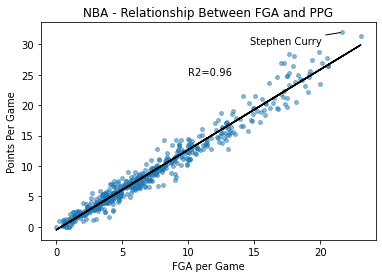

In [7]:
# Graficamos los datos..

# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=15, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(10,25, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly

plt.annotate(df.PLAYER[0],                       # This the name of the top scoring player. Refer to the .head() from earlier
             (x[0], y[0]),                       # This is the point we want to annotate.  
             (x[0]-7,y[0]-2),                    # These are coords for the text
             arrowprops=dict(arrowstyle='-'))    # Here we use a flat line for the arrow '-'

print(df.head())

# Pintamos en el grafico el jugador en la posición "0", que es el mejor en tiros x partido intentados de 1,2 y 3 puntos (FGA) y puntos..

In [9]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == 'BOS'][0]
print(celtics)
celtics_id = celtics['id']

milwaukee = [team for team in nba_teams if team['full_name'] == 'Milwaukee Bucks'][0]
print(milwaukee)
mil_id = milwaukee['id']

# Query for games where the Celtics were playing
data8 = endpoints.leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = data8.get_data_frames()[0]
print(games[:5])

data9 = endpoints.leaguegamefinder.LeagueGameFinder(team_id_nullable=mil_id)
# The first DataFrame of those returned is what we want.
games1 = data9.get_data_frames()[0]
games1.head()

{'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}
{'id': 1610612749, 'full_name': 'Milwaukee Bucks', 'abbreviation': 'MIL', 'nickname': 'Bucks', 'city': 'Milwaukee', 'state': 'Wisconsin', 'year_founded': 1968}
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME     GAME_ID   GAME_DATE  ... AST STL  BLK  TOV  PF  PLUS_MINUS
0     42020  1610612738               BOS  Boston Celtics  0042000115  2021-06-01  ...  18   3   12   11  21       -14.0
1     42020  1610612738               BOS  Boston Celtics  0042000114  2021-05-30  ...  24   8    4   10  21       -15.0
2     42020  1610612738               BOS  Boston Celtics  0042000113  2021-05-28  ...  21   5    3   13  25         6.0
3     42020  1610612738               BOS  Boston Celtics  0042000112  2021-05-25  ...  23  10    4   15  20       -22.0
4     42020  1610612738               BOS  Boston Celtics  0042000111  20

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612749,MIL,Milwaukee Bucks,0042000406,2021-07-20,MIL vs. PHX,W,240,105,37,82,0.451,6,27,0.222,25,29,0.862,11,42,53,20,10,6,18,17,7.0
1,42020,1610612749,MIL,Milwaukee Bucks,0042000405,2021-07-17,MIL @ PHX,W,240,123,50,87,0.575,14,28,0.500,9,17,0.529,11,26,37,26,7,1,11,17,4.0
2,42020,1610612749,MIL,Milwaukee Bucks,0042000404,2021-07-14,MIL vs. PHX,W,240,109,39,97,0.402,7,29,0.241,24,29,0.828,17,31,48,22,11,3,5,18,6.0
3,42020,1610612749,MIL,Milwaukee Bucks,0042000403,2021-07-11,MIL vs. PHX,W,240,120,43,90,0.478,14,36,0.389,20,26,0.769,13,34,47,28,8,2,9,18,20.0
4,42020,1610612749,MIL,Milwaukee Bucks,0042000402,2021-07-08,MIL @ PHX,L,240,108,42,93,0.452,9,31,0.290,15,23,0.652,18,28,46,21,8,7,9,17,-10.0


In [10]:
df.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201939,1,Stephen Curry,GSW,63,2152,658,1365,0.482,337,801,0.421,362,395,0.916,29,316,345,363,77,8,213,119,2015,1855,1.70,0.36
1,203081,2,Damian Lillard,POR,67,2398,602,1334,0.451,275,704,0.391,449,484,0.928,32,251,283,505,62,17,203,102,1928,1825,2.49,0.31
2,203999,3,Nikola Jokic,DEN,72,2488,732,1293,0.566,92,237,0.388,342,394,0.868,205,575,780,599,95,48,222,192,1898,2585,2.70,0.43
3,203078,4,Bradley Beal,WAS,60,2147,670,1382,0.485,130,373,0.349,408,459,0.889,72,211,283,265,69,22,187,140,1878,1567,1.42,0.37
4,1629029,5,Luka Doncic,DAL,66,2262,647,1351,0.479,192,548,0.350,344,471,0.730,54,473,527,567,64,36,281,152,1830,1912,2.02,0.23


In [54]:
# PLAYOFF

# self.east_conf_playoff_picture = Endpoint.DataSet(data=data_sets['EastConfPlayoffPicture']) -> [0]
# self.east_conf_remaining_games = Endpoint.DataSet(data=data_sets['EastConfRemainingGames']) -> [4]
# self.east_conf_standings = Endpoint.DataSet(data=data_sets['EastConfStandings'])            -> [2]
# self.west_conf_playoff_picture = Endpoint.DataSet(data=data_sets['WestConfPlayoffPicture']) -> [1]
# self.west_conf_remaining_games = Endpoint.DataSet(data=data_sets['WestConfRemainingGames']) -> [5]
# self.west_conf_standings = Endpoint.DataSet(data=data_sets['WestConfStandings'])            -> [3]

# Tabla que refleja los enfrentamientos de los 8 clasificados de la conf. ESTE y Oeste (si no pones nada última temporada)
# 1ª ronda PlayOff..

print(endpoints.playoffpicture)
data_po = endpoints.playoffpicture.PlayoffPicture()  # get_request() # east_conf_playoff_picture()
df_poEste = data_po.get_data_frames()[0] # El diccionario de tipo JSON tiene 0...5 posiciones
df_poOeste = data_po.get_data_frames()[1]
# print(len(df_po))
pd.concat([df_poEste.head(), df_poOeste.head()])

<module 'nba_api.stats.endpoints.playoffpicture' from 'C:\\Users\\0016571\\Anaconda3\\lib\\site-packages\\nba_api\\stats\\endpoints\\playoffpicture.py'>


,CONFERENCE,HIGH_SEED_RANK,HIGH_SEED_TEAM,HIGH_SEED_TEAM_ID,LOW_SEED_RANK,LOW_SEED_TEAM,LOW_SEED_TEAM_ID,HIGH_SEED_SERIES_W,HIGH_SEED_SERIES_L,HIGH_SEED_SERIES_REMAINING_G,HIGH_SEED_SERIES_REMAINING_HOME_G,HIGH_SEED_SERIES_REMAINING_AWAY_G
0,East,1,Philadelphia,1610612755,8,Washington,1610612764,3,0,0,0,0
1,East,2,Brooklyn,1610612751,7,Boston,1610612738,3,0,0,0,0
2,East,3,Milwaukee,1610612749,6,Miami,1610612748,2,1,0,0,0
3,East,4,New York,1610612752,5,Atlanta,1610612737,3,0,0,0,0
0,West,1,Utah,1610612762,8,Memphis,1610612763,3,0,0,0,0
1,West,2,Phoenix,1610612756,7,L.A. Lakers,1610612747,2,1,0,0,0
2,West,3,Denver,1610612743,6,Portland,1610612757,2,1,0,0,0
3,West,4,LA Clippers,1610612746,5,Dallas,1610612742,1,2,0,0,0


In [80]:
# Pruebas..

data_po1 = endpoints.playoffpicture.PlayoffPicture()
df_popruebas = data_po1.get_data_frames()[4]
df_popruebas

,TEAM,TEAM_ID,REMAINING_G,REMAINING_HOME_G,REMAINING_AWAY_G
0,Atlanta,1610612737,0,0,0
1,Boston,1610612738,0,0,0
2,Brooklyn,1610612751,0,0,0
3,Charlotte,1610612766,0,0,0
4,Chicago,1610612741,0,0,0
5,Cleveland,1610612739,0,0,0
6,Detroit,1610612765,0,0,0
7,Indiana,1610612754,0,0,0
8,Miami,1610612748,0,0,0
9,Milwaukee,1610612749,0,0,0


In [58]:
# Todos los partidos de Temporada regular..

data_gl = endpoints.leaguegamelog.LeagueGameLog()
df_gl = data_gl.get_data_frames()[0]
df_gl

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,1610612746,LAC,LA Clippers,0022000002,2020-12-22,LAC @ LAL,W,240,44,93,0.473,14,40,0.350,14,19,0.737,11,29,40,22,10,3,16,29,116,7,1
1,22020,1610612747,LAL,Los Angeles Lakers,0022000002,2020-12-22,LAL vs. LAC,L,240,38,81,0.469,9,29,0.310,24,31,0.774,8,37,45,22,4,2,19,20,109,-7,1
2,22020,1610612744,GSW,Golden State Warriors,0022000001,2020-12-22,GSW @ BKN,L,240,37,99,0.374,10,33,0.303,15,23,0.652,13,34,47,26,6,6,18,24,99,-26,1
3,22020,1610612751,BKN,Brooklyn Nets,0022000001,2020-12-22,BKN vs. GSW,W,240,42,92,0.457,15,35,0.429,26,32,0.813,13,44,57,24,11,7,20,22,125,26,1
4,22020,1610612755,PHI,Philadelphia 76ers,0022000013,2020-12-23,PHI vs. WAS,W,240,41,87,0.471,8,28,0.286,23,30,0.767,10,37,47,22,11,8,18,25,113,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,22020,1610612741,CHI,Chicago Bulls,0022001068,2021-05-16,CHI vs. MIL,W,240,45,87,0.517,14,32,0.438,14,19,0.737,8,37,45,23,8,8,16,20,118,6,1
2156,22020,1610612747,LAL,Los Angeles Lakers,0022001072,2021-05-16,LAL @ NOP,W,240,45,96,0.469,11,35,0.314,9,15,0.600,8,34,42,30,14,5,10,16,110,12,1
2157,22020,1610612740,NOP,New Orleans Pelicans,0022001072,2021-05-16,NOP vs. LAL,L,240,37,78,0.474,9,25,0.360,15,21,0.714,8,39,47,26,4,5,21,18,98,-12,1
2158,22020,1610612762,UTA,Utah Jazz,0022001077,2021-05-16,UTA @ SAC,W,240,41,86,0.477,18,39,0.462,21,25,0.840,9,41,50,28,9,3,16,14,121,22,1


In [88]:
# Tabla que relaciona los partidos de playOff..

data_pogames = endpoints.commonplayoffseries.CommonPlayoffSeries()
df_pogames = data_pogames.get_data_frames()[0]
df_pogames


,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SERIES_ID,GAME_NUM
0,0042000101,1610612755,1610612764,004200010,1
1,0042000102,1610612755,1610612764,004200010,2
2,0042000103,1610612764,1610612755,004200010,3
3,0042000104,1610612764,1610612755,004200010,4
4,0042000105,1610612755,1610612764,004200010,5
...,...,...,...,...,...
80,0042000402,1610612756,1610612749,004200040,2
81,0042000403,1610612749,1610612756,004200040,3
82,0042000404,1610612749,1610612756,004200040,4
83,0042000405,1610612756,1610612749,004200040,5


In [99]:
# incluimos todos los game_id en una lista

gameIdPO = []
for ind in df_pogames['GAME_ID']:
    gameIdPO.append(ind)

len(gameIdPO)
print(gameIdPO[0])

# Query for games where the Celtics were playing
data_game = endpoints.leaguegamefinder.LeagueGameFinder()
# The first DataFrame of those returned is what we want.
df_game1 = data_game.get_data_frames()[0]
# print(game1[:5])
df_game11 = df_game1[df_game1['GAME_ID'] == gameIdPO[0]]
df_game11

# planets_2008 = planets[planets['year'] == 2008]

#data9 = endpoints.leaguegamefinder.LeagueGameFinder(team_id_nullable=mil_id)
# The first DataFrame of those returned is what we want.
#games1 = data9.get_data_frames()[0]
#games1.head()

0042000101


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
913,42020,1610612755,PHI,Philadelphia 76ers,0042000101,2021-05-23,PHI vs. WAS,W,240,125,46,93,0.495,10,32,0.313,23,33,0.697,13,27,40,27,10,5,11,18,7.0
917,42020,1610612764,WAS,Washington Wizards,0042000101,2021-05-23,WAS @ PHI,L,241,118,49,88,0.557,8,20,0.400,12,15,0.800,7,34,41,26,4,4,15,24,-7.0


In [108]:
serieIdPO = []
for ind in df_pogames['SERIES_ID']:
    serieIdPO.append(ind)

print(df_pogames['SERIES_ID'].unique())

gamesIdsSeries = []
gameIds = []
for ind2 in df_pogames['SERIES_ID'].unique():
     for ind3 in df_pogames['SERIES_ID']:
            if ind3 == ind2:
                gameIds.append(df_pogames['GAME_ID'])
    #gamesIdsSeries.append(gameIds)

print(gameIds)
            

len(serieIdPO)
#print(serieIdPO.unique())


['004200010' '004200011' '004200012' '004200013' '004200014' '004200015'
 '004200016' '004200017' '004200020' '004200021' '004200022' '004200023'
 '004200030' '004200031' '004200040']
[0     0042000101
1     0042000102
2     0042000103
3     0042000104
4     0042000105
         ...    
80    0042000402
81    0042000403
82    0042000404
83    0042000405
84    0042000406
Name: GAME_ID, Length: 85, dtype: object, 0     0042000101
1     0042000102
2     0042000103
3     0042000104
4     0042000105
         ...    
80    0042000402
81    0042000403
82    0042000404
83    0042000405
84    0042000406
Name: GAME_ID, Length: 85, dtype: object, 0     0042000101
1     0042000102
2     0042000103
3     0042000104
4     0042000105
         ...    
80    0042000402
81    0042000403
82    0042000404
83    0042000405
84    0042000406
Name: GAME_ID, Length: 85, dtype: object, 0     0042000101
1     0042000102
2     0042000103
3     0042000104
4     0042000105
         ...    
80    0042000402
81    004

340

In [215]:
print(gameIdPO[0])

# Query for games where the Celtics were playing
data_game = endpoints.leaguegamefinder.LeagueGameFinder()
# The first DataFrame of those returned is what we want.
df_games = data_game.get_data_frames()[0]
print(df_games.head())
# print(game1[:5])
#df_game11 = df_game1[df_game1['GAME_ID'] == gameIdPO[0]]
#df_game11
ids_series = df_pogames['SERIES_ID'].unique()
#for ind4 in ids_series:
#    df_game2 = df_game1[(df_game1['SERIES_ID'] == ind4)]
#df_game2
ids_series

df_ids_games = df_pogames['GAME_ID'].groupby(df_pogames['SERIES_ID'])

for ids, idg in df_ids_games:
    print(ids,':\n',idg)
    # print(df_games(df_games['GAME_ID'] == idg))
    for i in idg:
        print(i)
        df_game = df_games[df_games.GAME_ID == i]
        print(df_game)
    #print(type(idg))
# df_ids_games.
#df_gamesSeries = df_games[df_games['GAME_ID'] == idg[0]]
#df_gamesSeries

#type(df_ids_games)


# PROBAR A UNIR CON UN JOIN LA TABLA DE LAS SERIES DE PLYAOFF CON LA DE GAMES

0042000101
  SEASON_ID  TEAM_ID TEAM_ABBREVIATION                 TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
0     22021      240               GEN              Gen.G Tigers  1222100119  ...   6   4   7  10        21.0
1     22021      210               HCG         Heat Check Gaming  1222100118  ...   6   4   6   9         4.0
2     22021      202               WDG   Wizards District Gaming  1222100120  ...   4   3   5  13         3.0
3     22021      240               GEN              Gen.G Tigers  1222100280  ...   3   2   4   9        -1.0
4     22021      221               PGT                Pistons GT  1222100279  ...   3   2   9   9       -13.0

[5 rows x 28 columns]
004200010 :
 0    0042000101
1    0042000102
2    0042000103
3    0042000104
4    0042000105
Name: GAME_ID, dtype: object
0042000101
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
972     42020  1610612755               PHI  Philadelphia 76ers 

[2 rows x 28 columns]
0042000145
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
775     42020  1610612762               UTA          Utah Jazz  0042000145  ...  10   5  14  16        16.0
780     42020  1610612763               MEM  Memphis Grizzlies  0042000145  ...   7   6  14  12       -16.0

[2 rows x 28 columns]
004200015 :
 24    0042000151
25    0042000152
26    0042000153
27    0042000154
28    0042000155
29    0042000156
Name: GAME_ID, dtype: object
0042000151
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
962     42020  1610612756               PHX        Phoenix Suns  0042000151  ...   7   4  14  20         9.0
963     42020  1610612747               LAL  Los Angeles Lakers  0042000151  ...  10   5  14  18        -9.0

[2 rows x 28 columns]
0042000152
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_M

    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
620     42020  1610612755               PHI  Philadelphia 76ers  0042000203  ...   8   4  10  26        16.0
629     42020  1610612737               ATL       Atlanta Hawks  0042000203  ...   6   1  11  28       -16.0

[2 rows x 28 columns]
0042000204
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
573     42020  1610612737               ATL       Atlanta Hawks  0042000204  ...   5   4   4  18         3.0
575     42020  1610612755               PHI  Philadelphia 76ers  0042000204  ...   2   6  12  18        -3.0

[2 rows x 28 columns]
0042000205
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
560     42020  1610612755               PHI  Philadelphia 76ers  0042000205  ...   7   6  15  21        -3.0
563     42020  1610612737               ATL       Atlanta Ha

[2 rows x 28 columns]
0042000234
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME     GAME_ID   GAME_DATE  ... AST STL  BLK  TOV  PF  PLUS_MINUS
576     42020  1610612743               DEN  Denver Nuggets  0042000234  2021-06-13  ...  22   6    3    8  24        -7.0
585     42020  1610612756               PHX    Phoenix Suns  0042000234  2021-06-13  ...  18   6    6   14  21         7.0

[2 rows x 28 columns]
004200030 :
 67    0042000301
68    0042000302
69    0042000303
70    0042000304
71    0042000305
72    0042000306
Name: GAME_ID, dtype: object
0042000301
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  ... STL BLK TOV  PF  PLUS_MINUS
444     42020  1610612737               ATL    Atlanta Hawks  0042000301  ...   5   2  11  17         3.0
452     42020  1610612749               MIL  Milwaukee Bucks  0042000301  ...   6   4   8  14        -3.0

[2 rows x 28 columns]
0042000302
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAM

In [184]:
#df_join = df_pogames.join( df_games, on = ["GAME_ID"])

# df_join = pd.concat([df_games['GAME_ID'], df_pogames['GAME_ID']], join = 'inner')
df_join = pd.concat([df_games, df_pogames], join = 'inner')
df_join
df_join.shape
# df_join2 = df_games.join(df_pogames, on = ["GAME_ID"])

(30085, 1)

In [183]:
type(df_join)
list_gamesIds = list(df_join['GAME_ID'])
list_gamesIds
#for indgames in df_join['GAME_ID']:
#    df_game2 = df_games[(df_games['GAME_ID'] == indgames)]
#    df_game2

print(type(df_games), df_games.shape)

<class 'pandas.core.frame.DataFrame'> (30000, 28)


In [6]:

import json

import pandas as pd
import requests

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

header_data  = {
    'User-Agent': 'Some User Agent',
    'x-nba-stats-origin': 'stats',
    'Referer': 'https://stats.nba.com/',
}


# endpoints
def player_stats_url(season):
    return "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season={0}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight=".format(
        season)


# Extract json
def extract_data(url):
    r = requests.get(url, headers=header_data)                  # Call the GET endpoint
    resp = r.json()                                             # Convert the response to a json object
    #print(resp)
    results = resp['resultSets'][0]                             # take the first item in the resultsSet (This can be determined by inspection of the json response)
    headers = results['headers']                                # take the headers of the response (our column names)
    rows = results['rowSet']                                    # take the rows of our response
    frame = pd.DataFrame(rows)                                  # convert the rows to a dataframe
    frame.columns = headers                                     # set our column names using the  extracted headers
    return frame


season = "2020-21"

frame = extract_data(player_stats_url(season))
#print(frame)

df = pd.DataFrame(frame)
print(df.count())
#df.head()
df.sort_values("NBA_FANTASY_PTS", ascending = False)

PLAYER_ID               540
PLAYER_NAME             540
NICKNAME                540
TEAM_ID                 540
TEAM_ABBREVIATION       540
                       ... 
NBA_FANTASY_PTS_RANK    540
DD2_RANK                540
TD3_RANK                540
CFID                    540
CFPARAMS                540
Length: 66, dtype: int64


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
399,203999,Nikola Jokic,Nikola,1610612743,DEN,26.0,72,47,25,0.653,2487.781667,732,1293,0.566,92,237,0.388,342,394,0.868,205,575,780,599,222,95,48,62,192,418,1898,384,3939.5,60,16,1,11,326,104,3,1,8,51,117,132,133,12,14,89,8,7,5,3,5,11,55,517,529,4,3,10,1,1,2,5,"203999,1610612743"
452,201566,Russell Westbrook,Russell,1610612764,WAS,32.0,65,30,35,0.462,2368.846667,544,1238,0.439,86,273,0.315,271,413,0.656,109,641,750,763,312,89,23,73,190,309,1445,-88,3513.5,59,38,81,143,481,311,7,14,10,280,127,100,327,21,12,418,44,3,7,1,1,14,152,535,528,17,19,433,2,2,1,5,"201566,1610612764"
339,1629029,Luka Doncic,Luka,1610612742,DAL,22.0,66,40,26,0.606,2262.396667,647,1351,0.479,192,548,0.350,344,471,0.730,54,473,527,567,281,64,36,51,152,364,1830,164,3331.9,26,11,70,48,341,139,15,5,4,168,10,7,226,11,6,337,126,12,19,5,2,56,92,495,488,7,5,54,3,18,4,5,"1629029,1610612742"
184,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,26.0,61,40,21,0.656,2012.733333,626,1100,0.569,67,221,0.303,398,581,0.685,97,574,671,357,207,72,73,56,168,470,1717,409,3285.7,41,7,124,48,258,99,46,7,19,50,167,135,348,5,1,395,50,8,11,21,8,40,18,507,504,1,6,8,4,8,6,5,"203507,1610612749"
400,202696,Nikola Vucevic,Nikola,1610612741,CHI,30.0,70,26,44,0.371,2348.153333,666,1396,0.477,176,440,0.400,131,156,0.840,146,671,817,269,126,65,48,52,137,162,1639,-341,3235.9,48,2,21,201,523,411,9,3,1,175,16,21,93,79,93,140,21,2,3,50,49,55,55,497,464,68,11,532,5,5,13,5,"202696,1610612741"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,203943,Noah Vonleh,Noah,1610612751,BKN,25.0,4,3,1,0.750,10.766667,0,3,0.000,0,2,0.000,0,0,0.000,0,1,1,1,2,0,0,1,2,0,0,-16,0.7,0,0,519,482,6,18,536,535,532,535,480,492,480,521,523,521,518,531,531,516,505,511,495,39,17,527,536,288,536,245,29,5,"203943,1610612751"
193,204222,Greg Whittington,Greg,1610612743,DEN,28.0,4,3,1,0.750,12.016667,0,3,0.000,0,2,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,9,0.0,0,0,519,482,6,18,533,535,532,535,480,492,480,521,523,521,518,535,538,531,530,511,495,1,1,527,536,202,537,245,29,5,"204222,1610612743"
30,1630204,Ashton Hagans,Ashton,1610612750,MIN,21.0,2,0,2,0.000,4.066667,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,1,0,0,0,0,0,0,-3,-1.0,0,0,532,531,15,531,538,535,540,535,480,522,480,521,523,521,518,535,538,531,519,511,495,1,1,527,536,241,538,245,29,5,"1630204,1610612750"
531,1630266,Will Magnay,Will,1610612740,NOP,23.0,1,1,0,1.000,3.266667,0,1,0.000,0,1,0.000,0,0,0.000,0,0,0,0,1,0,0,0,1,0,0,-10,-1.0,0,0,537,515,1,1,539,535,537,535,480,507,480,521,523,521,518,535,538,531,519,511,495,1,8,527,536,270,538,245,29,5,"1630266,1610612740"
